In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import Callback
from keras.utils import np_utils
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train / 255
x_test = x_test / 255
y_train, y_test = np_utils.to_categorical(y_train), np_utils.to_categorical(y_test)

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
class StopCallback(Callback):
  def on_epoch_end(self, epoch, log={}):
    if log.get("loss") < 0.2:
      self.model.stop_training = True

In [ ]:
# checkpoint = ModelCheckpoint("best_weights.hdf5", save_best_only=True)
callback = StopCallback()

model.fit(x_train,
          y_train,
          batch_size=128,
          epochs=50,
          validation_split=0.2,
          callbacks=[callback])

Epoch 1/50
375/375 [==============================] - 5s 13ms/step - loss: 0.5956 - accuracy: 0.7923 - val_loss: 0.4477 - val_accuracy: 0.8314
Epoch 2/50
375/375 [==============================] - 5s 12ms/step - loss: 0.4161 - accuracy: 0.8499 - val_loss: 0.3738 - val_accuracy: 0.8664
Epoch 3/50
375/375 [==============================] - 5s 13ms/step - loss: 0.3675 - accuracy: 0.8641 - val_loss: 0.3580 - val_accuracy: 0.8688
Epoch 4/50
375/375 [==============================] - 5s 13ms/step - loss: 0.3415 - accuracy: 0.8733 - val_loss: 0.3422 - val_accuracy: 0.8775
Epoch 5/50
375/375 [==============================] - 5s 14ms/step - loss: 0.3248 - accuracy: 0.8791 - val_loss: 0.3327 - val_accuracy: 0.8782
Epoch 6/50
375/375 [==============================] - 4s 11ms/step - loss: 0.3101 - accuracy: 0.8867 - val_loss: 0.3307 - val_accuracy: 0.8792
Epoch 7/50
375/375 [==============================] - 4s 11ms/step - loss: 0.2957 - accuracy: 0.8905 - val_loss: 0.3287 - val_accuracy: 0.8803

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3540 - accuracy: 0.8859


[0.3540285527706146, 0.8859000205993652]

## **Convolutional neural network**

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation="sigmoid"))
cnn_model.add(Dense(10, activation="softmax"))

In [ ]:
cnn_model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
cnn_model.fit(x_train, y_train, epochs=50, callbacks=[callback])

Epoch 1/50
1875/1875 [==============================] - 103s 54ms/step - loss: 0.4699 - accuracy: 0.8270
Epoch 2/50
1875/1875 [==============================] - 94s 50ms/step - loss: 0.3099 - accuracy: 0.8857
Epoch 3/50
1875/1875 [==============================] - 93s 50ms/step - loss: 0.2671 - accuracy: 0.9007
Epoch 4/50
1875/1875 [==============================] - 96s 51ms/step - loss: 0.2404 - accuracy: 0.9123
Epoch 5/50
1875/1875 [==============================] - 96s 51ms/step - loss: 0.2191 - accuracy: 0.9195
Epoch 6/50
1875/1875 [==============================] - 94s 50ms/step - loss: 0.2040 - accuracy: 0.9252
Epoch 7/50
1875/1875 [==============================] - 95s 51ms/step - loss: 0.1905 - accuracy: 0.9295


In [ ]:
cnn_model.evaluate(x_train, y_train)

1875/1875 [==============================] - 26s 14ms/step - loss: 0.1546 - accuracy: 0.9449


[0.1545705497264862, 0.9449333548545837]

In [ ]:
cnn_outputs = [layer.output for layer in cnn_model.layers]
features = Model(inputs=cnn_model.input, outputs=cnn_outputs)

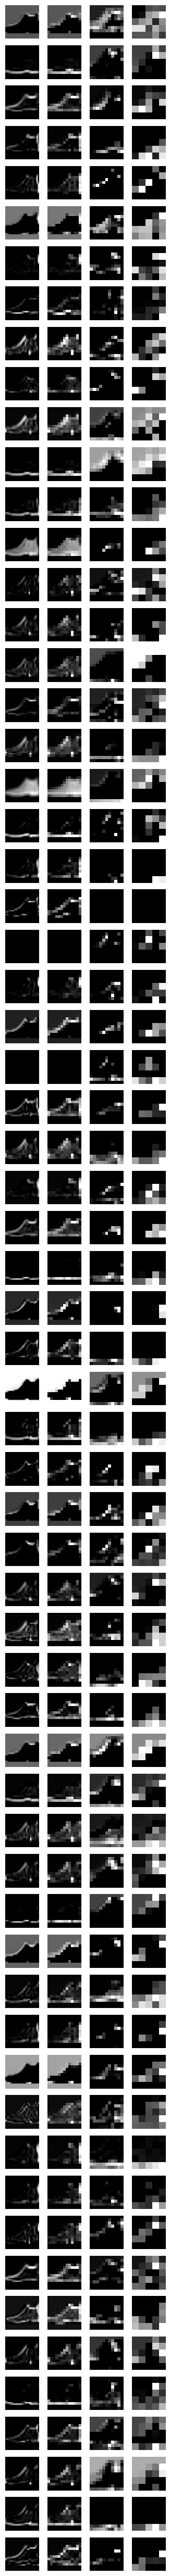

In [ ]:
f, axarr = plt.subplots(nrows=64, ncols=4, figsize=(4, 64))

FIRST = 0
SECCOND = 7
THIRD = 6

LAYER = 10

for i in range(64):
  for x in range(0, 4):
    f1 = features.predict(x_test[FIRST].reshape(1, 28, 28, 1), verbose=0)[x]
    axarr[i, x].imshow(f1[0, :, :, i], cmap="gray")
    axarr[i, x].set_axis_off()